Observations:

Celebrities have a strong influence on names immediately when they become famous. They can have an effect on both males and females with that name.

In general, when a male version of a name increases, the female version will decrease. This is true for the opposite case as well.

Popular female names are more susceptible to sharper increases and declines than male names. The number of unique top male names has not changed nearly as much as the number of unique top female names due to there more gradual increases and decreases.

In [1]:
#Dependencies 
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Import Clean Data
data_file = os.path.join("Revised National Names Male.csv")
national_names_male_df = pd.read_csv(data_file)
data_file = os.path.join("Revised National Names Female.csv")
national_names_female_df = pd.read_csv(data_file)
national_names_male_df.head()
data_file = os.path.join("StateNames.csv")
state_names_df = pd.read_csv(data_file)

In [3]:
#Drop id column from states
state_names_df.drop('Id', axis=1, inplace=True)
state_names_df.head()

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7


In [4]:
#Drop unneeded column from national dataframes
national_names_male_df.drop('Unnamed: 0', axis=1, inplace=True)
national_names_female_df.drop('Unnamed: 0', axis=1, inplace=True)
national_names_male_df.head()

,Id,Name,Year,Gender,Count,Rank,First Year,Total Count
0,943,John,1880,M,9655,1,1880,5084943
1,944,William,1880,M,9532,2,1880,4055473
2,945,James,1880,M,5927,3,1880,5105919
3,946,Charles,1880,M,5348,4,1880,2364332
4,947,George,1880,M,5126,5,1880,1454503


In [5]:
#Merge Dataframes
df_merge = pd.merge(national_names_female_df, national_names_male_df, how='outer', left_on=['Name','Year'], right_on=['Name','Year'])
df_merge_needed = df_merge[['Name','Year', 'Count_x', 'Count_y']]
df_merge_needed.columns = ['Name','Year', 'Female Count', 'Male Count']
df_merge_needed.sort_values('Male Count', ascending = False).head()

,Name,Year,Female Count,Male Count
239187,James,1947,257.0,94755.0
302925,Michael,1957,254.0,92709.0
239225,Robert,1947,236.0,91642.0
296031,Michael,1956,244.0,90633.0
309894,Michael,1958,295.0,90519.0


In [6]:
#Find Names that are gender neutral 
total_names = df_merge_needed.groupby("Name").sum().sort_values('Female Count', ascending=False)
total_names['Total Counts']= total_names['Female Count']+total_names['Male Count']
total_names['Percentage Male']= total_names['Male Count']/total_names['Total Counts']*100
total_names = total_names.sort_values('Percentage Male', ascending=False)
total_names.head()

,Year,Female Count,Male Count,Total Counts,Percentage Male
Name,,,,,
Rocco,242110,5.0,24812.0,24817.0,99.979853
Matt,262845,5.0,23399.0,23404.0,99.978636
Doug,170962,5.0,22454.0,22459.0,99.977737
Ezekiel,262845,7.0,30068.0,30075.0,99.976725
Rodrigo,188783,5.0,21385.0,21390.0,99.976625


In [7]:
#Only show top ten (by total count) names that are most gender neutral (40%-60%)
middle = total_names[(total_names['Percentage Male']<=60) & (total_names['Percentage Male']>=40)]
middle.sort_values('Total Counts', ascending = False).head(10)
middle.drop(['Year'], axis=1, inplace=True)
middle = middle.reset_index()
middle.sort_values('Total Counts', ascending = False).head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Name,Female Count,Male Count,Total Counts,Percentage Male
47,Casey,75060.0,108595.0,183655.0,59.129890
412,Riley,81605.0,87494.0,169099.0,51.741288
711,Jackie,90337.0,78148.0,168485.0,46.382764
153,Jaime,49480.0,65697.0,115177.0,57.040034
871,Peyton,58567.0,44037.0,102604.0,42.919379
460,Kerry,48452.0,49417.0,97869.0,50.493006
238,Frankie,32355.0,39894.0,72249.0,55.217373
642,Robbie,22215.0,20676.0,42891.0,48.205917
19,Emerson,13225.0,19477.0,32702.0,59.559048
158,Carey,12669.0,16693.0,29362.0,56.852394


In [8]:
#Find largest change between years in male and female names
sorted_male_df = national_names_male_df.sort_values(['Name','Year'])
sorted_male_df['Change'] = abs(sorted_male_df.groupby('Name')['Count'].diff(1))
sorted_female_df = national_names_female_df.sort_values(['Name','Year'])
sorted_female_df['Change'] = abs(sorted_female_df.groupby('Name')['Count'].diff(1))
sorted_male_df.sort_values('Change', ascending = False).head(10)
sorted_male_df.drop(['Id'], axis=1, inplace=True)
sorted_female_df.drop(['Id'], axis=1, inplace=True)

In [9]:
#Show top ten female names by size of change between years
top_changes_female = sorted_female_df.sort_values('Change', ascending = False).head(10)
top_changes_female

,Name,Year,Gender,Count,Rank,First Year,Total Count,Change
238672,Linda,1947,F,99680,1,1880,1450843,46972.0
177025,Shirley,1935,F,42357,2,1880,684656,19521.0
542928,Ashley,1983,F,33292,4,1917,834720,18444.0
262992,Deborah,1951,F,42043,4,1880,739273,12972.0
68512,Mary,1915,F,58187,1,1880,4115282,12843.0
401339,Jennifer,1970,F,46160,1,1916,1462742,12455.0
494304,Amanda,1979,F,31926,3,1880,781807,11406.0
232986,Linda,1946,F,52708,2,1880,1450843,11243.0
619594,Brittany,1989,F,37786,3,1963,356473,10971.0
368980,Michelle,1966,F,27152,4,1915,804495,10937.0


In [10]:
#Show top ten male names by size of change between years
top_changes_male = sorted_male_df.sort_values('Change', ascending = False).head(10)
top_changes_male

,Name,Year,Gender,Count,Rank,First Year,Total Count,Change
188365,Robert,1946,M,84130,2,1880,4796695,14204.0
188366,John,1946,M,79248,3,1880,5084943,13125.0
188364,James,1946,M,87425,1,1880,5105919,12975.0
188368,Richard,1946,M,58859,5,1880,2555330,12814.0
192385,David,1947,M,57797,6,1880,3577704,11362.0
188370,Michael,1946,M,41178,7,1880,4309198,11266.0
41283,John,1912,M,24587,1,1880,5084943,11142.0
271977,John,1965,M,71563,2,1880,5084943,10973.0
295268,Jason,1970,M,27296,13,1880,1014584,10792.0
172587,James,1942,M,77173,1,1880,5105919,10454.0


In [64]:
#Print out top ten tables
import six
def render_mpl_table(data, col_width=20.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax
fig = render_mpl_table(middle, header_columns=0, col_width=2.0)
plt.savefig('mostgenderneutral' +'.png')

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [56]:
fig = render_mpl_table(top_changes_female.head(10), header_columns=0, col_width=2.0)
plt.savefig('steepestfemaleincrease' +'.png')

In [62]:
fig = render_mpl_table(top_changes_male.head(10), header_columns=0, col_width=2.0)
plt.savefig('steepestmaleincrease' +'.png')

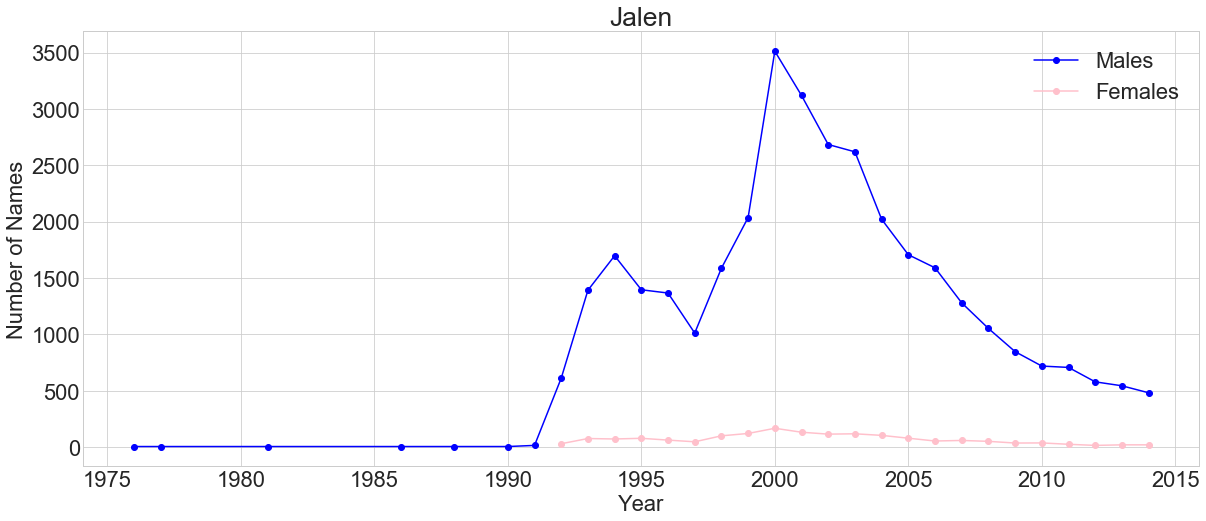

In [82]:
#Plot number of Jalens over time nationally

jalen_male = national_names_male_df[national_names_male_df['Name']=='Jalen'].sort_values('Year')
jalen_female = national_names_female_df[national_names_female_df['Name']=='Jalen'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jalen_male["Year"], jalen_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jalen_female["Year"], jalen_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jalen')
    plt.savefig ('Jalen' +'.png')
    plt.show()


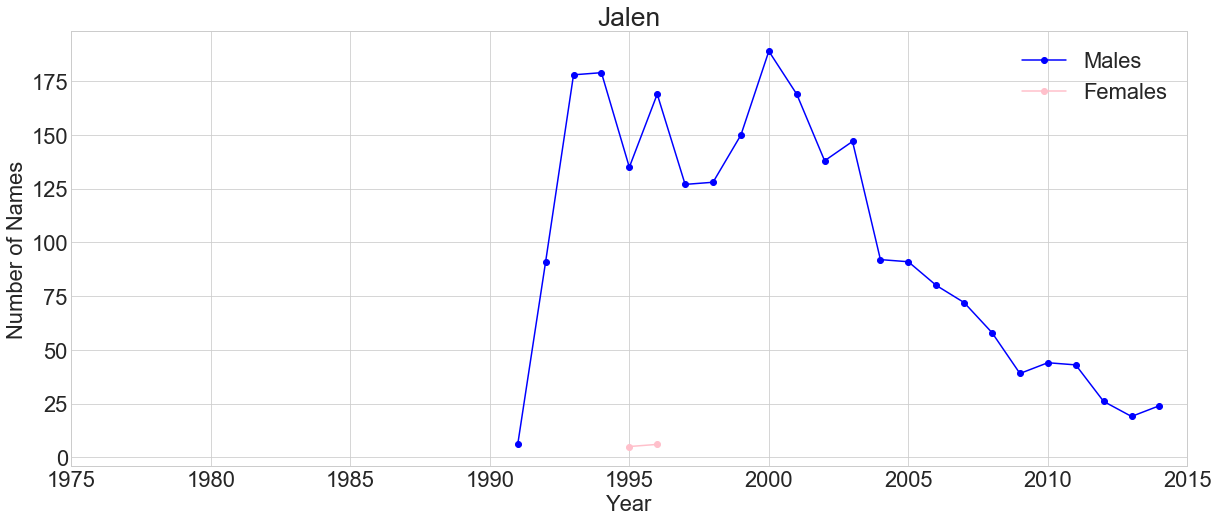

In [83]:
#Plot number of Jalens over time in the state of Michigan

michigan_df = state_names_df[state_names_df['State']=='MI']
michigan_male_df = michigan_df[michigan_df['Gender']=='M']
michigan_female_df = michigan_df[michigan_df['Gender']=='F']
jalen_male = michigan_male_df[michigan_male_df['Name']=='Jalen'].sort_values('Year')
jalen_female = michigan_female_df[michigan_female_df['Name']=='Jalen'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jalen_male["Year"], jalen_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jalen_female["Year"], jalen_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jalen')
    plt.xlim(1975, 2015)
    plt.savefig ('JalenMI' +'.png')
    plt.show()


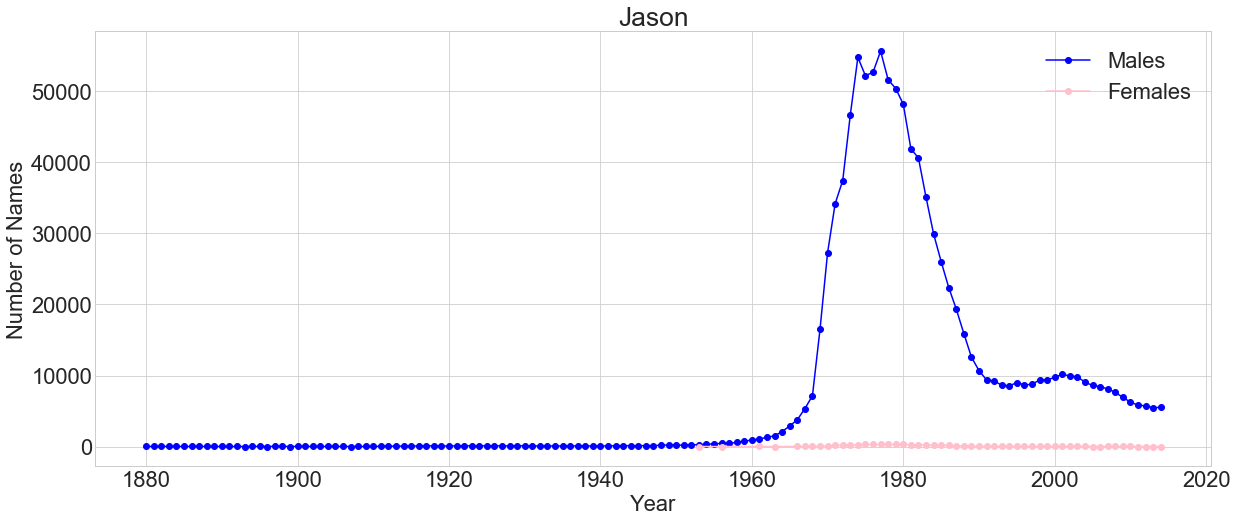

In [18]:
#Plot number of Jasons over time nationally

jason_male = national_names_male_df[national_names_male_df['Name']=='Jason'].sort_values('Year')
jason_female = national_names_female_df[national_names_female_df['Name']=='Jason'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jason_male["Year"], jason_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jason_female["Year"], jason_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jason')
    plt.savefig ('Jason' +'.png')
    plt.show()


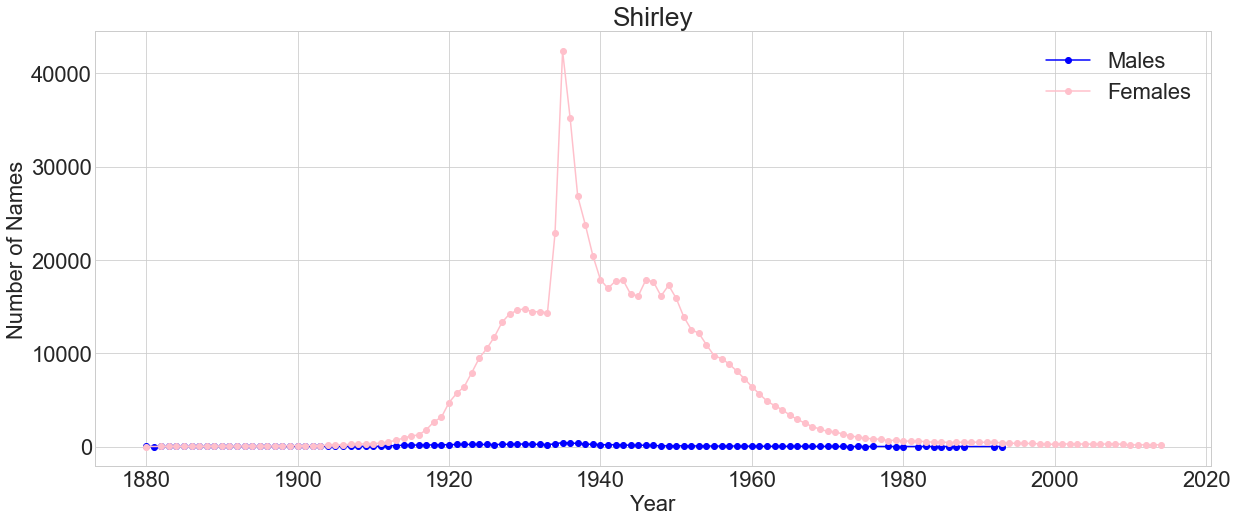

In [19]:
#Plot number of Shirleys over time nationally

shirley_male = national_names_male_df[national_names_male_df['Name']=='Shirley'].sort_values('Year')
shirley_female = national_names_female_df[national_names_female_df['Name']=='Shirley'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(shirley_male["Year"], shirley_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(shirley_female["Year"], shirley_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Shirley')
    plt.savefig ('Shirley' +'.png')
    plt.show()

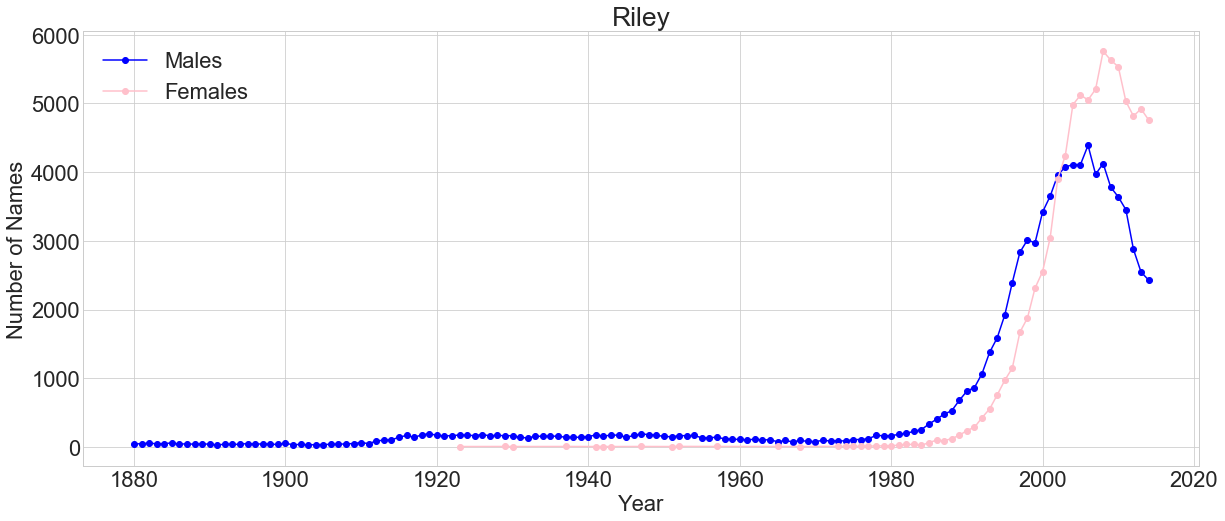

In [20]:
#Plot number of Rileys over time nationally

riley_male = national_names_male_df[national_names_male_df['Name']=='Riley'].sort_values('Year')
riley_female = national_names_female_df[national_names_female_df['Name']=='Riley'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(riley_male["Year"], riley_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(riley_female["Year"], riley_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Riley')
    plt.savefig ('Riley' +'.png')
    plt.show()


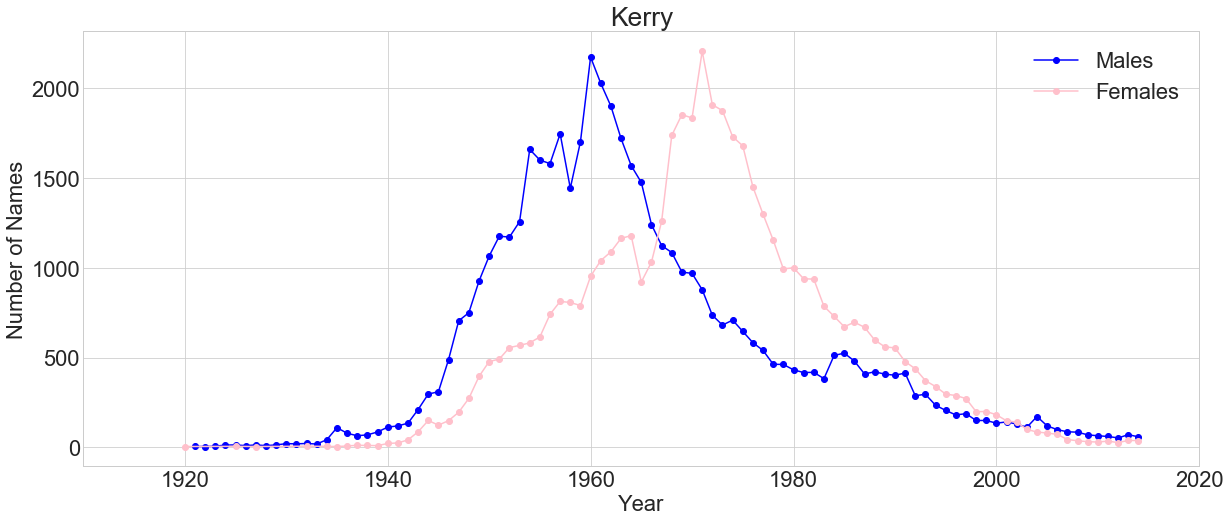

In [6]:
#Plot number of Kerrys over time nationally

kerry_male = national_names_male_df[national_names_male_df['Name']=='Kerry'].sort_values('Year')
kerry_female = national_names_female_df[national_names_female_df['Name']=='Kerry'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(kerry_male["Year"], kerry_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(kerry_female["Year"], kerry_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Kerry')
    plt.xlim(1910, 2020)
    plt.savefig ('Kerry' +'.png')
    plt.show()


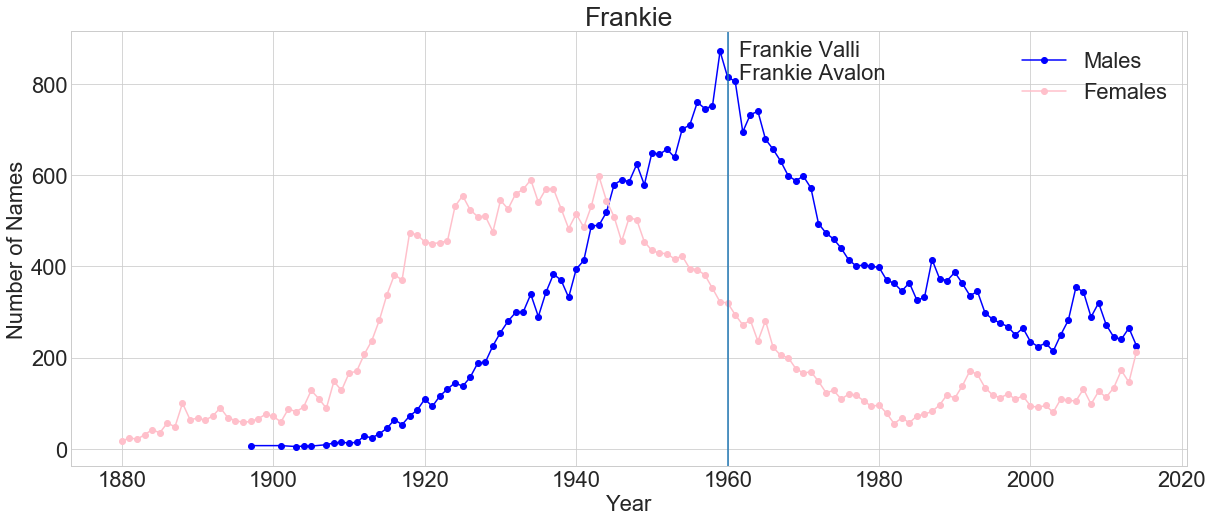

In [22]:
#Plot number of Frankies over time nationally  (include famous Frankies)

frankie_male = national_names_male_df[national_names_male_df['Name']=='Frankie'].sort_values('Year')
frankie_female = national_names_female_df[national_names_female_df['Name']=='Frankie'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(frankie_male["Year"], frankie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(frankie_female["Year"], frankie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Frankie')    
    plt.axvline(1960)
    plt.text(1961.5, 810,'Frankie Valli\nFrankie Avalon')
    plt.savefig ('Frankie' +'.png')
    plt.show()

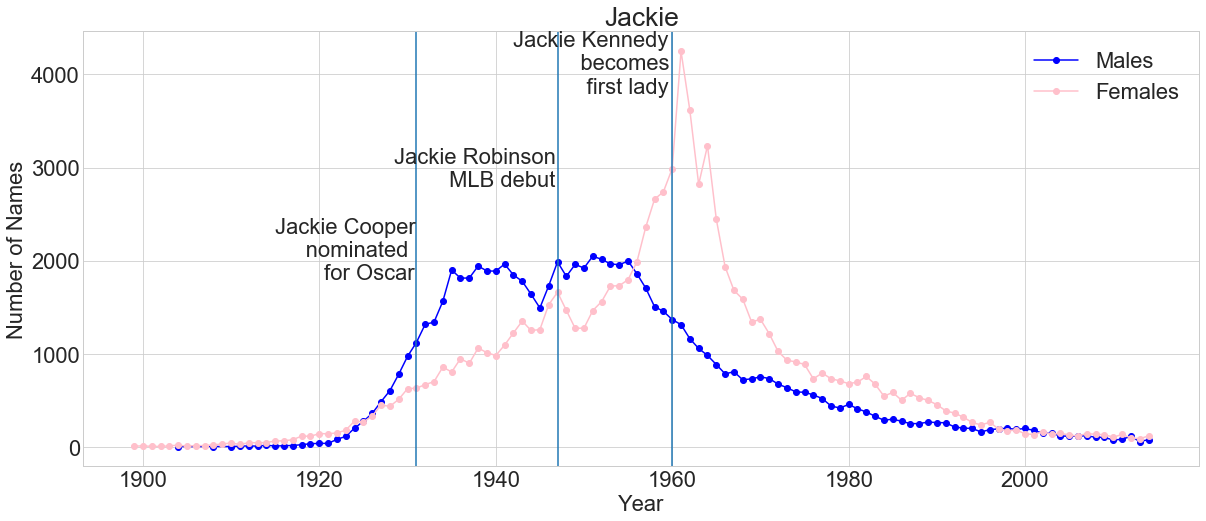

In [40]:
#Plot number of Jackies over time nationally (include famous Jackies)

jackie_male = national_names_male_df[national_names_male_df['Name']=='Jackie'].sort_values('Year')
jackie_female = national_names_female_df[national_names_female_df['Name']=='Jackie'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jackie_male["Year"], jackie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jackie_female["Year"], jackie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jackie')
    plt.axvline(1947)
    plt.axvline(1931)
    plt.axvline(1960)
    plt.text(1928.5, 2800,'Jackie Robinson' + '\n' + '         MLB debut')
    plt.text(1915, 1800,'Jackie Cooper' + '\n' + '     nominated' + '\n' + '        for Oscar')
    plt.text(1942, 3800,'Jackie Kennedy' + '\n' + '           becomes' + '\n' + '            first lady')
    plt.savefig ('Jackie' +'.png')

    plt.show()

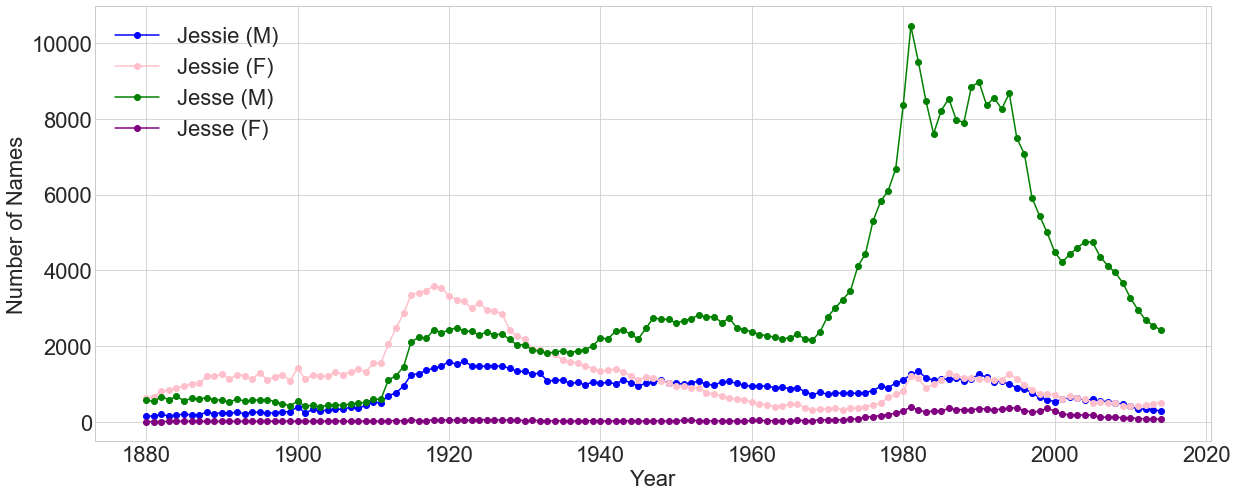

In [24]:
#Plot number of Jesses over time nationally (include alternate spellings)

jesse_male = national_names_male_df[national_names_male_df['Name']=='Jesse'].sort_values('Year')
jesse_female = national_names_female_df[national_names_female_df['Name']=='Jesse'].sort_values('Year')
jessie_male = national_names_male_df[national_names_male_df['Name']=='Jessie'].sort_values('Year')
jessie_female = national_names_female_df[national_names_female_df['Name']=='Jessie'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jessie_male["Year"], jessie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jessie_female["Year"], jessie_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(jesse_male["Year"], jesse_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(jesse_female["Year"], jesse_female["Count"], marker = 'o', color = 'purple')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Jessie (M)", "Jessie (F)", "Jesse (M)", "Jesse (F)"])
    plt.savefig ('Jessie' +'.png')
    plt.show()

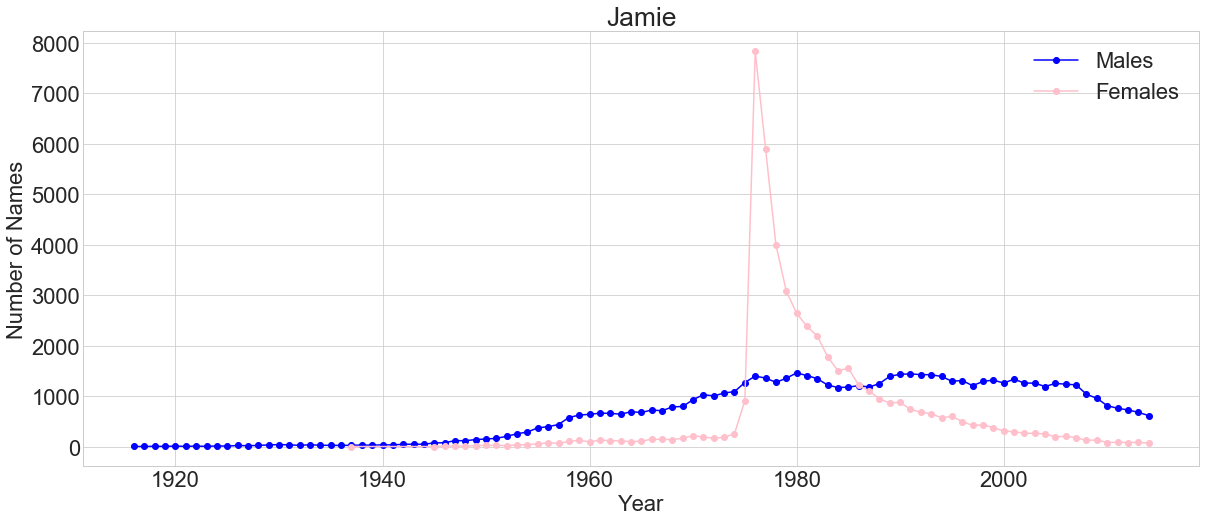

In [25]:
#Plot number of Jamies over time nationally

jaime_male = national_names_male_df[national_names_male_df['Name']=='Jaime'].sort_values('Year')
jaime_female = national_names_female_df[national_names_female_df['Name']=='Jaime'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jaime_male["Year"], jaime_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jaime_female["Year"], jaime_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Jamie')    
    plt.savefig ('Jaime' +'.png')
    plt.show()


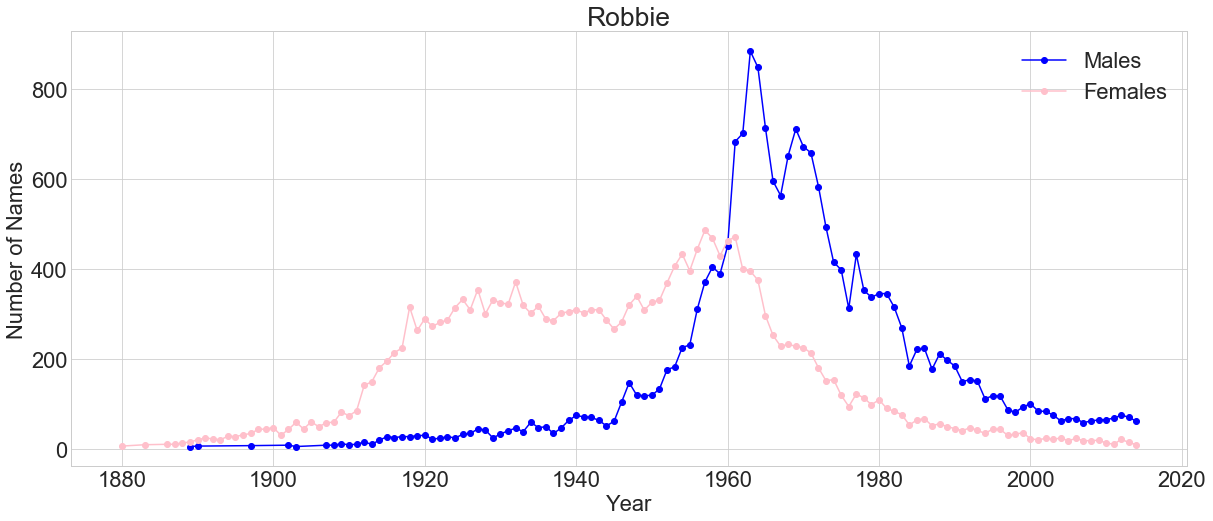

In [41]:
#Plot number of Robbies over time nationally

robbie_male = national_names_male_df[national_names_male_df['Name']=='Robbie'].sort_values('Year')
robbie_female = national_names_female_df[national_names_female_df['Name']=='Robbie'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(robbie_male["Year"], robbie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(robbie_female["Year"], robbie_female["Count"], marker = 'o', color = 'pink')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Males", "Females"])
    plt.title('Robbie')
    plt.axvline(1975)
    plt.text(1958, 7800,'                Debut of' + '\n' + 'My Three Sons')
    plt.savefig ('Robbie' +'.png')
    plt.show()


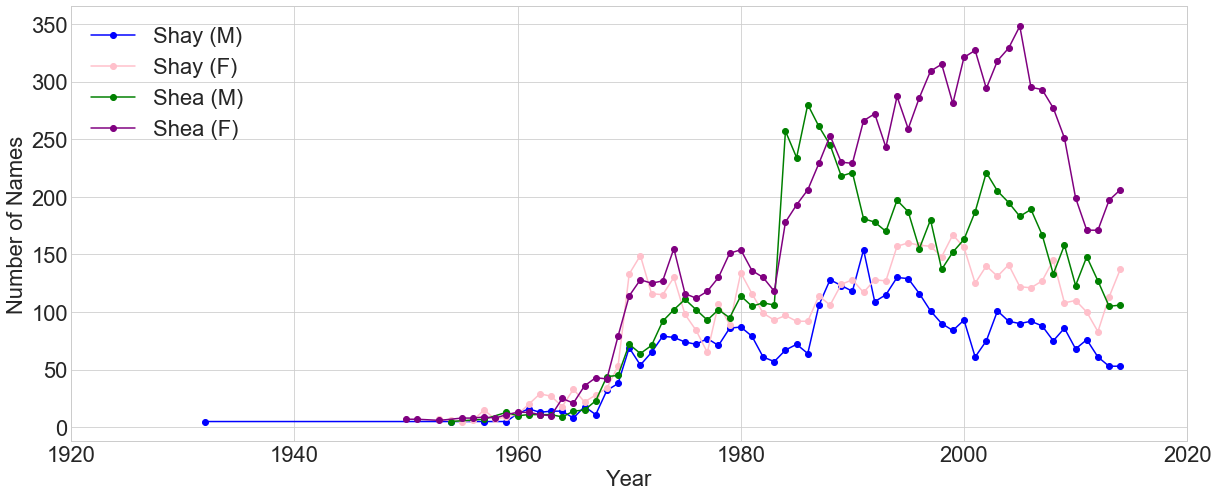

In [26]:
#Plot number of Sheas over time nationally (include alternate spellings)

shea_male = national_names_male_df[national_names_male_df['Name']=='Shea'].sort_values('Year')
shea_female = national_names_female_df[national_names_female_df['Name']=='Shea'].sort_values('Year')
shay_male = national_names_male_df[national_names_male_df['Name']=='Shay'].sort_values('Year')
shay_female = national_names_female_df[national_names_female_df['Name']=='Shay'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(shay_male["Year"], shay_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(shay_female["Year"], shay_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(shea_male["Year"], shea_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(shea_female["Year"], shea_female["Count"], marker = 'o', color = 'purple')

    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Shay (M)", "Shay (F)", "Shea (M)", "Shea (F)"])
    plt.savefig ('Shay' +'.png')
    plt.xlim(1920, 2020)
    plt.show()


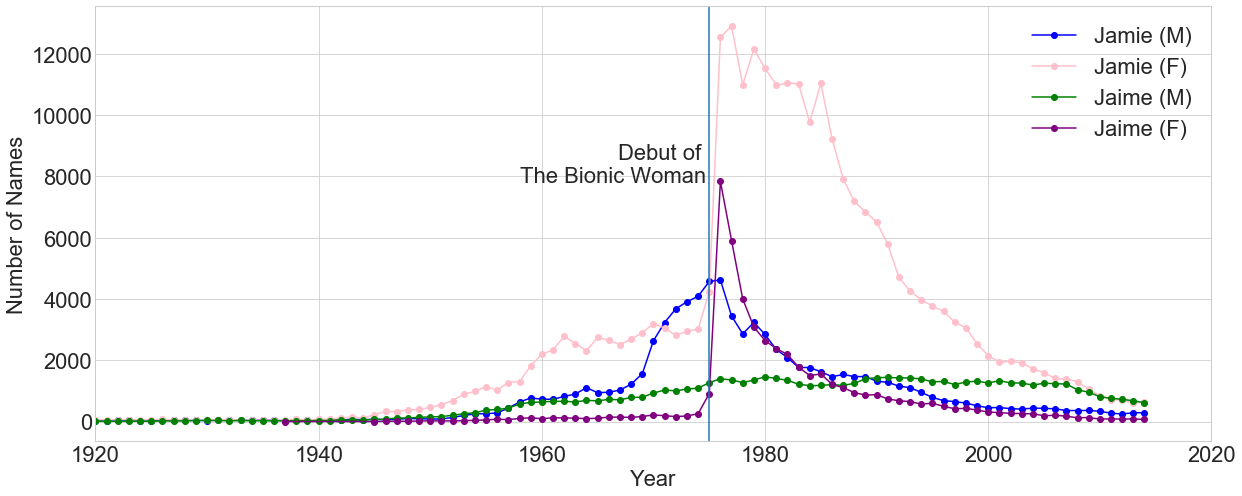

In [52]:
#Plot number of Jesses over time nationally (include alternate spellings and famous Jaime)

jaime_male = national_names_male_df[national_names_male_df['Name']=='Jaime'].sort_values('Year')
jaime_female = national_names_female_df[national_names_female_df['Name']=='Jaime'].sort_values('Year')
jamie_male = national_names_male_df[national_names_male_df['Name']=='Jamie'].sort_values('Year')
jamie_female = national_names_female_df[national_names_female_df['Name']=='Jamie'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(jamie_male["Year"], jamie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(jamie_female["Year"], jamie_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(jaime_male["Year"], jaime_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(jaime_female["Year"], jaime_female["Count"], marker = 'o', color = 'purple')
    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Jamie (M)", "Jamie (F)", "Jaime (M)", "Jaime (F)"])
    plt.xlim(1920, 2020)
    plt.axvline(1975)
    plt.text(1958, 7800,'                Debut of' + '\n' + 'The Bionic Woman')
    plt.savefig ('Jamie' +'.png')
    plt.show()

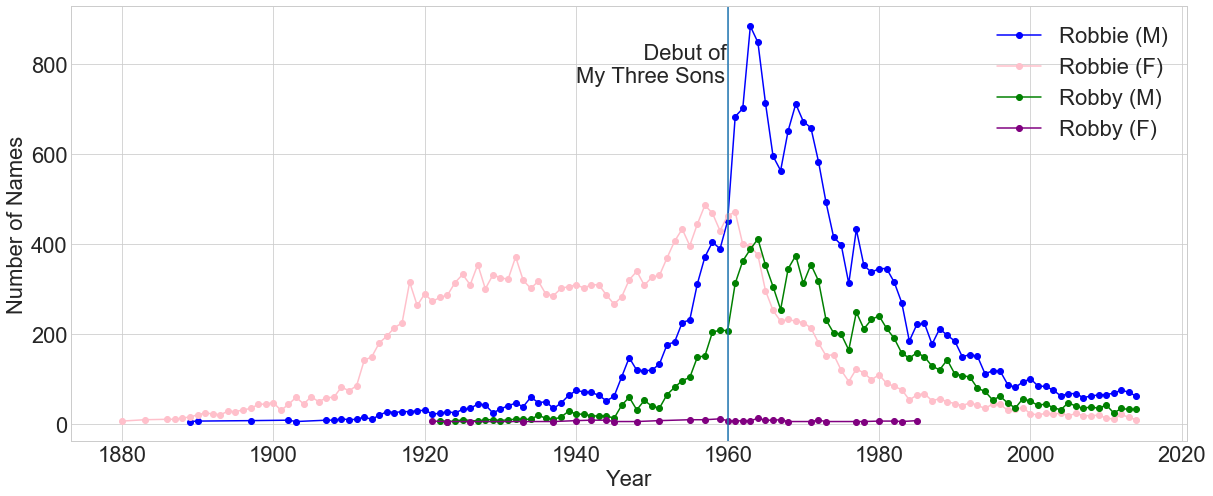

In [66]:
#Plot number of Jesses over time nationally (include alternate spellings and famous Robbie)

robby_male = national_names_male_df[national_names_male_df['Name']=='Robby'].sort_values('Year')
robby_female = national_names_female_df[national_names_female_df['Name']=='Robby'].sort_values('Year')
robbie_male = national_names_male_df[national_names_male_df['Name']=='Robbie'].sort_values('Year')
robbie_female = national_names_female_df[national_names_female_df['Name']=='Robbie'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(robbie_male["Year"], robbie_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(robbie_female["Year"], robbie_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(robby_male["Year"], robby_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(robby_female["Year"], robby_female["Count"], marker = 'o', color = 'purple')

    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Robbie (M)", "Robbie (F)", "Robby (M)", "Robby (F)"])
    plt.axvline(1960)
    plt.text(1940, 760,'           Debut of' + '\n' + 'My Three Sons')
    plt.savefig ('Robbie' +'.png')
    plt.show()


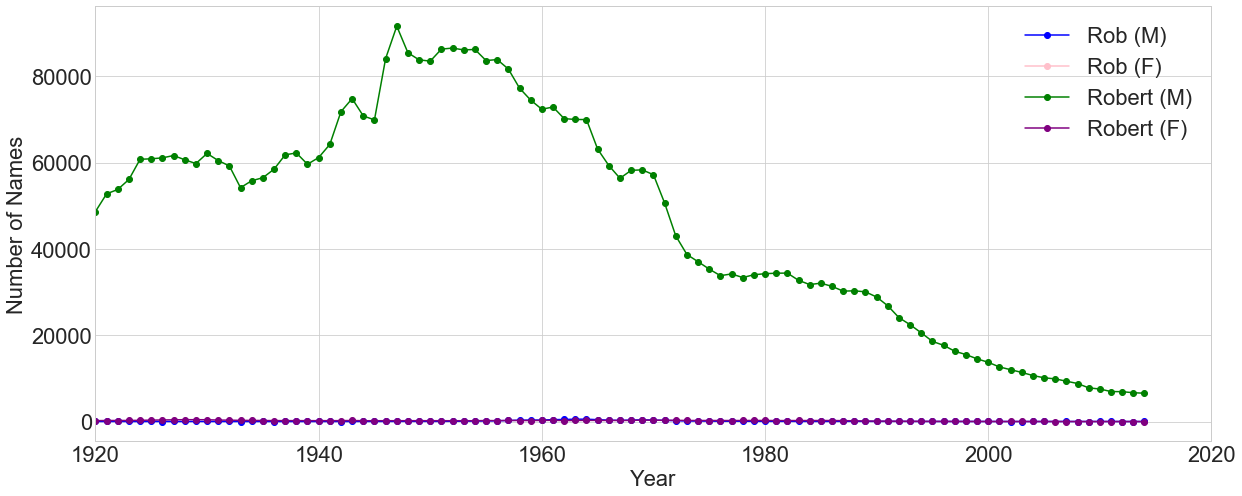

In [54]:
#Plot number of alternates to Robbie over time nationally (include alternate spellings)

robert_male = national_names_male_df[national_names_male_df['Name']=='Robert'].sort_values('Year')
robert_female = national_names_female_df[national_names_female_df['Name']=='Robert'].sort_values('Year')
rob_male = national_names_male_df[national_names_male_df['Name']=='Rob'].sort_values('Year')
rob_female = national_names_female_df[national_names_female_df['Name']=='Rob'].sort_values('Year')

plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})

with plt.style.context('seaborn-whitegrid'):
    male = plt.plot(rob_male["Year"], rob_male["Count"], marker = 'o', color = 'b')
    female = plt.plot(rob_female["Year"], rob_female["Count"], marker = 'o', color = 'pink')  
    alt_male = plt.plot(robert_male["Year"], robert_male["Count"], marker = 'o', color = 'green')
    alt_female = plt.plot(robert_female["Year"], robert_female["Count"], marker = 'o', color = 'purple')

    plt.xlabel("Year")
    plt.ylabel("Number of Names")
    plt.legend(["Rob (M)", "Rob (F)", "Robert (M)", "Robert (F)"])
    plt.savefig ('Rob' +'.png')
    plt.xlim(1920, 2020)
    plt.show()
